# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [ ]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [5]:
import numpy
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    z = (x**2)*numpy.sin(x)
    return(z);

Ensure your function works with numpy arrays:

In [6]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [11]:
import numpy
def g(x):
    '''Analytical integral of f(x).'''
    z = (2*x*numpy.sin(x))-(((x**2)-2)*numpy.cos(x))-2
    return(z);

Check your solution with the same numpy array:

In [12]:
assert g(0) == 0.

In [13]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [48]:
import numpy
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    z =((2*xmax*numpy.sin(xmax))-(((xmax**2)-2)*numpy.cos(xmax))-2)-((2*xmin*numpy.sin(xmin))-(((xmin**2)-2)*numpy.cos(xmin))-2)
    return(z);


Check your analytic function:

In [15]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [44]:
import numpy
def integrate_numeric(xmin, xmax, N):
    z = 0
    dx = (xmax - xmin) /N
    for i in range(1,N+1):
        z = z + (4*((numpy.sin(xmin+((i-0.5)*dx)))*((xmin+((i-0.5)*dx)**2))))+(numpy.sin((xmin+((i-1)*dx)))*((xmin+((i-1)*dx))**2))+(numpy.sin((xmin+((i)*dx)))*((xmin+((i)*dx))**2))

    y = (dx/6)*(z)
    return(y);

Make sure you have implemented Simpson's rule correctly:

In [45]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [46]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


[0.60205999 0.90308999 1.20411998 1.50514998 1.80617997 2.10720997
 2.40823997 2.70926996 3.01029996] [-3.798880910662142, -5.009147304202647, -6.2147998679457075, -7.419302739892127, -8.623518304424364, -9.827660836467324, -11.0317797687619, -12.23633692116822, -13.439784517125503]


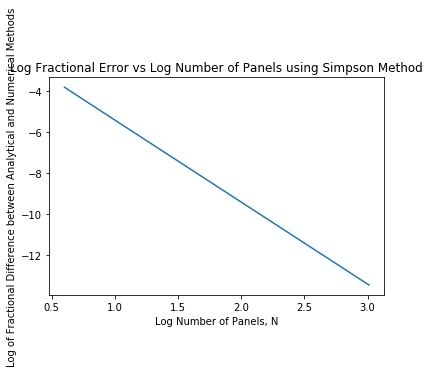

In [38]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline
x0, x1 = 0,2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use

def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    z =((2*xmax*numpy.sin(xmax))-(((xmax**2)-2)*numpy.cos(xmax))-2)-((2*xmin*numpy.sin(xmin))-(((xmin**2)-2)*numpy.cos(xmin))-2)
    return(z);
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

def integrate_numeric(xmin,xmax,N):

    z = 0
    dx = (xmax - xmin) /N
    for i in range(1,N+1):
        z = z + (4*((numpy.sin(xmin+((i-0.5)*dx)))*((xmin+((i-0.5)*dx)**2))))+(numpy.sin((xmin+((i-1)*dx)))*((xmin+((i-1)*dx))**2))+(numpy.sin((xmin+((i)*dx)))*((xmin+((i)*dx))**2))

    y = (dx/6)*(z)
    return(y);
x = numpy.log10(panel_counts)

y = [numpy.log10((result_analytic-integrate_numeric(x0,x1,panel_counts[0]))/result_analytic),numpy.log10((result_analytic-integrate_numeric(x0,x1,panel_counts[1]))/result_analytic),numpy.log10((result_analytic-integrate_numeric(x0,x1,panel_counts[2]))/result_analytic),numpy.log10((result_analytic-integrate_numeric(x0,x1,panel_counts[3]))/result_analytic),numpy.log10((result_analytic-integrate_numeric(x0,x1,panel_counts[4]))/result_analytic),numpy.log10((result_analytic-integrate_numeric(x0,x1,panel_counts[5]))/result_analytic),numpy.log10((result_analytic-integrate_numeric(x0,x1,panel_counts[6]))/result_analytic),numpy.log10((result_analytic-integrate_numeric(x0,x1,panel_counts[7]))/result_analytic),numpy.log10((result_analytic-integrate_numeric(x0,x1,panel_counts[8]))/result_analytic)]
plt.xlabel("Log Number of Panels, N")
plt.ylabel("Log of Fractional Difference between Analytical and Numerical Methods")
plt.title("Log Fractional Error vs Log Number of Panels using Simpson Method")
plt.plot(x,y)
print(x,y)

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The fractional error scales as 1/N^4 10 times the number of panels equates to a 10^4 times lower fractional error. When the number of panels used is too high and the error gets to 10^-15/10^-16 (~10000 panels) computer rounding errors appear which lead to an overall loss of accuracy causing larger errors

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The fractional error using the trapezium rule scales to 1/N^2 10 times the number of panels equates to 100 times less fractional error. Computing rounding errors will only occur with N in the range of 10^7 ~ 10^8